<a href="https://colab.research.google.com/github/daJarae/NLP/blob/main/%EB%B0%B1%EC%9D%B8%EC%9D%BC%EC%88%98_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%83%9D%EC%84%B1(%E7%99%BE%E4%BA%BA%E4%B8%80%E9%A6%96%E3%83%87%E3%83%BC%E3%82%BF%E7%94%9F%E6%88%90).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

오구라 백인일수를 주제로 한 NLP 초보자의 가벼운 프로젝트입니다.

*판단에 따라 국문 설명이나 일본어, 영어 역을 추가할 예정입니다.

をぐら百人一首を主題にしたNLP初心者の簡単なプロジェクトです。

This is NLP beginner's easy project using 100 Japanese ancient poems(百人一首)  text.

#데이터 준비 データの準備

위키 페이지에서 백인일수와 주제를 불러와 데이터프레임을 만듭니다.

Wikiページから百人一首と部建てを読み込んでデータフレームを作ります。



In [1]:
import requests
import pandas as pd

url=requests.get('https://ja.wikisource.org/wiki/%E5%B0%8F%E5%80%89%E7%99%BE%E4%BA%BA%E4%B8%80%E9%A6%96')

In [2]:
url.text

'<!DOCTYPE html>\n<html class="client-nojs" lang="ja" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>小倉百人一首 - Wikisource</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"ja","wgMonthNames":["","1月","2月","3月","4月","5月","6月","7月","8月","9月","10月","11月","12月"],"wgRequestId":"3dc7fe1b-16f9-4176-af80-64c3ae0c3131","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"小倉百人一首","wgTitle":"小倉百人一首","wgCurRevisionId":165623,"wgRevisionId":165623,"wgArticleId":12,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["100%","日本の古代文学","日本の中世文学","和歌","平安時代","鎌倉時代","CC-BY-SA-3.0"],"wgPageContentLanguage":"ja","wgPageContentModel":"wikitext","wgRelevantPageName":"小倉百人一首","wgRelevantArticleId":12,"wgIsProbablyEditable":true,"wgRelevantPageIsProbab

In [3]:
import re

hnis=re.findall('<td style="vertical-align:top">(.+)<br />（<b>', url.text)
hnis=[re.sub('<br />',' ',s) for s in hnis]

theme=re.findall('集</a>(.)', url.text)
theme=theme[1:101]

In [4]:
hnis[:5]

['秋の田の かりほの庵の とまをあらみ わが衣手は 露にぬれつつ',
 '春過ぎて 夏来にけらし 白妙の 衣ほすてふ 天の香具山',
 '足引きの 山鳥の尾の しだり尾の ながながし夜を ひとりかもねむ',
 '田子の浦に 打出でてみれば 白妙の ふじの高嶺に 雪は降りつつ',
 '奥山に 紅葉ふみ分け なく鹿の 聲きく時ぞ 秋は悲しき']

In [5]:
theme[:5]

['秋', '夏', '恋', '冬', '秋']

In [6]:
print('百人一首: ', len(hnis))
print('部建て: ', len(theme))

百人一首:  100
部建て:  100




---



히라가나 문장, 키마리지를 추가해보겠습니다.

In [7]:
hnis_kn=re.findall('（<b>(.+)）', url.text) #백인일수 가나
hnis_kn=[re.sub('[\W</b>r]','',s) for s in hnis_kn]

In [8]:
hnis_kn[:5]

['あきのたのかりほのいほのとまをあらみわがころもではつゆにぬれつつ',
 'はるすぎてなつきにけらししろたへのころもほすてふあまのかぐやま',
 'あしびきのやまどりのをのしだりをのながながしよをひとりかもねむ',
 'たごのうらにうちいでてみればしろたへのふじのたかねにゆきはふりつつ',
 'おくやまにもみぢふみわけなくしかのこゑきくときぞあきはかなしき']

In [9]:
kimari=re.findall('<br />（<b>(.+)</b>', url.text) #키마리지

In [10]:
kimari[:5]

['あきの', 'はるす', 'あし', 'たご', 'おく']

In [11]:
nb= list(range(1,101)) #백인일수 번호

In [12]:
ogura=pd.DataFrame({'nb':nb, 'theme': theme, 'hnis': hnis,'hnis_kn': hnis_kn, 'kimari': kimari})

In [13]:
ogura

,nb,theme,hnis,hnis_kn,kimari
0,1,秋,秋の田の かりほの庵の とまをあらみ わが衣手は 露にぬれつつ,あきのたのかりほのいほのとまをあらみわがころもではつゆにぬれつつ,あきの
1,2,夏,春過ぎて 夏来にけらし 白妙の 衣ほすてふ 天の香具山,はるすぎてなつきにけらししろたへのころもほすてふあまのかぐやま,はるす
2,3,恋,足引きの 山鳥の尾の しだり尾の ながながし夜を ひとりかもねむ,あしびきのやまどりのをのしだりをのながながしよをひとりかもねむ,あし
3,4,冬,田子の浦に 打出でてみれば 白妙の ふじの高嶺に 雪は降りつつ,たごのうらにうちいでてみればしろたへのふじのたかねにゆきはふりつつ,たご
4,5,秋,奥山に 紅葉ふみ分け なく鹿の 聲きく時ぞ 秋は悲しき,おくやまにもみぢふみわけなくしかのこゑきくときぞあきはかなしき,おく
...,...,...,...,...,...
95,96,雑,花さそふ あらしの庭の 雪ならで ふりゆくものは 我が身なりけり,はなさそふあらしのにはのゆきならでふりゆくものはわがみなりけり,はなさ
96,97,恋,来ぬ人を 松帆の浦の 夕なぎに 焼くや藻塩の 身もこがれつつ,こぬひとをまつほのうらのゆふなぎにやくやもしほのみもこがれつつ,こぬ
97,98,夏,風そよぐ 楢の小川の 夕ぐれは みそぎぞ夏の しるしなりける,かぜそよぐならのをがはのゆふぐれはみそぎぞなつのしるしなりける,かぜそ
98,99,雑,人もをし 人もうらめし あぢきなく 世を思ふ故に もの思ふ身は,ひともをしひともうらめしあぢきなくよをおもふゆゑにものおもふみは,ひとも


In [14]:
len('あきの')

3

In [15]:
#키마리지 추가 (決まり字)
def kimariji(x):
  return len(x)

ogura['kimariji']=ogura['kimari'].apply(kimariji)

In [16]:
ogura.head(4)

,nb,theme,hnis,hnis_kn,kimari,kimariji
0,1,秋,秋の田の かりほの庵の とまをあらみ わが衣手は 露にぬれつつ,あきのたのかりほのいほのとまをあらみわがころもではつゆにぬれつつ,あきの,3
1,2,夏,春過ぎて 夏来にけらし 白妙の 衣ほすてふ 天の香具山,はるすぎてなつきにけらししろたへのころもほすてふあまのかぐやま,はるす,3
2,3,恋,足引きの 山鳥の尾の しだり尾の ながながし夜を ひとりかもねむ,あしびきのやまどりのをのしだりをのながながしよをひとりかもねむ,あし,2
3,4,冬,田子の浦に 打出でてみれば 白妙の ふじの高嶺に 雪は降りつつ,たごのうらにうちいでてみればしろたへのふじのたかねにゆきはふりつつ,たご,2


토큰화를 위해 hnis열은 띄어쓰기를 보존하고, hnis_kn열은 공백을 제거했습니다.

Token化のためhnisコラムの空白は保存し、hnis_knコラムの空白は削除しました。



---



# 데이터 탐색 データ探索

와카는 57577의 율격을 지니지만 특수하게 한 글자가 적거나(字足らず）많은（字余り） 경우도 있습니다. 백인일수의 자수를 살펴보겠습니다. 

百人一首の中で字余りや字足らずに当たる和歌の数を確認します。

In [17]:
letter_num=[len(re.sub(' ','',s)) for s in hnis_kn]

In [18]:
pd.Series(letter_num).value_counts()

31    68
32    31
33     1
dtype: int64

예상대로 30자 이하나 34자 이상의 와카는 없습니다. 당시 와카의 규율이 굉장히 잘 지켜졌다는 것을 알 수 있습니다.

그러나 字余り가 한 수, 字足らず가 31자인 것은 의외입니다.

字足らずは６８首もあるのに字余りが１首しかないことは意外です。

참고로 collections 패키지의 Counter로도 빈도표를 만들 수 있습니다.
Counter 모듈로 빈도를 세고 결과를 출력하는 함수를 정의해보겠습니다.

Counterモデュールを使って頻度を数え結果を出力する関数を作ります。

In [19]:
def freq(count_list, what=''):
  from collections import Counter
  count=Counter(count_list)
  print(what)

  for i,v in sorted(count.items(), key=lambda x: x[1], reverse=True):   #빈도순 정렬 頻度順整列
    print (i, ': ', v)

이 함수를 이용해 여러 빈도를 확인해봅시다

In [20]:
freq(letter_num, '백인일수 자수')

백인일수 자수
31 :  68
32 :  31
33 :  1


In [21]:
freq(ogura.kimariji,'백인일수 키마리지의 글자수')

백인일수 키마리지의 글자수
2 :  43
3 :  36
1 :  7
7 :  6
4 :  6
5 :  2


한편 위 빈도가 카루타 암기용 키마리지순인 것은 아닙니다.

암기용 키마리지는 키마리지의 전체 길이 순이 아니라 공통된 첫글자를 공유하는 키마리지의 개수이기 때문입니다.

(해당 기준이 중요한 이유는 같은 글자로 시작하는 키라미지가 적을수록 경기 중 쳐내야할 후다(카드)가 빠르게 특정되기 때문.)

#키마리지그룹 열

In [22]:
first_let=[s[0] for s in ogura.hnis_kn]
freq(first_let, '백인일수 첫자')

백인일수 첫자
あ :  17
な :  8
わ :  7
た :  6
こ :  6
お :  5
み :  5
は :  4
か :  4
や :  4
よ :  4
き :  3
ち :  3
い :  3
ひ :  3
つ :  2
し :  2
ゆ :  2
う :  2
も :  2
す :  1
ふ :  1
を :  1
め :  1
さ :  1
せ :  1
ほ :  1
む :  1


키마리지 그룹순으로 번호를 매긴 열을 추가해보겠습니다.

競技用の決まり字グループでindexを付けたコラムを追加します。

(키마리지 그룹: むすめふさほせーうつしもゆーいちひきーはやよかーみーたこーおわーなーあ)

고전 일본어에서 'あふ'는 'おー'로 발음하는 원칙을 모르는 파이썬이 お그룹을 あ그룹로 분류할 것이므로 해당 키마리지를 조정하겠습니다.

In [23]:
[s for s in ogura.kimari if s[0]=='お' ]

['おく', 'おほえ', 'おと', 'おも', 'おほけ']

In [24]:
[s for s in ogura.kimari if s[0]=='あ' ]

#'あふ'가 키마리지인 행을 조정하면 되겠습니다

['あきの',
 'あし',
 'あまの',
 'あまつ',
 'ありあ',
 'あさぼらけ あ',
 'あさぢ',
 'あひ',
 'あふ',
 'あはれ',
 'あけ',
 'あらざ',
 'ありま',
 'あさぼらけ う',
 'あらし',
 'あはぢ',
 'あきか']

In [25]:
ogura[ogura['kimari']=='あふ']

,nb,theme,hnis,hnis_kn,kimari,kimariji
43,44,恋,逢ふことの 絶えてしなくば なかなかに 人をも身をも 恨みざらまし,あふことのたえてしなくばなかなかにひとをもみをもうらみざらまし,あふ,2


In [26]:
#셀단위 수정은 at 함수 이용
ogura.at[43,'kimari']='おお'

In [27]:
[s for s in ogura.kimari if s[0]=='お' ]

['おく', 'おお', 'おほえ', 'おと', 'おも', 'おほけ']

In [28]:
ogura.loc[43]

nb                                         44
theme                                       恋
hnis        逢ふことの 絶えてしなくば なかなかに 人をも身をも 恨みざらまし
hnis_kn       あふことのたえてしなくばなかなかにひとをもみをもうらみざらまし
kimari                                     おお
kimariji                                    2
Name: 43, dtype: object

In [29]:
first_let2=[s[0] for s in ogura.kimari]
freq(first_let2, '백인일수 첫자')

#44번 백인일수의 키마리지 수정이 반영되었습니다.

백인일수 첫자
あ :  16
な :  8
わ :  7
た :  6
お :  6
こ :  6
み :  5
は :  4
か :  4
や :  4
よ :  4
き :  3
ち :  3
い :  3
ひ :  3
つ :  2
し :  2
ゆ :  2
う :  2
も :  2
す :  1
ふ :  1
を :  1
め :  1
さ :  1
せ :  1
ほ :  1
む :  1


In [30]:
from collections import Counter
count=Counter(first_let2)
count

from collections import defaultdict #리스트를 value로 가지며 조회 불가 에러가 없는 dict
d=defaultdict(list)

for i,v in count.items():
  d[v].append(i)

In [31]:
d=dict(d)
#아래 딕셔너리의 index는 각 value list의 원소 글자를 첫글자로 공유하는 와카의 개수를 의미합니다.
#예를 들면 백인일 수 중 'つ'로 시작하는 와카는 'つき', 'つく' 두 가지이므로 2번 index에 할당되었습니다. 
d

{1: ['す', 'ふ', 'を', 'め', 'さ', 'せ', 'ほ', 'む'],
 2: ['つ', 'し', 'ゆ', 'う', 'も'],
 3: ['き', 'ち', 'い', 'ひ'],
 4: ['は', 'か', 'や', 'よ'],
 5: ['み'],
 6: ['た', 'お', 'こ'],
 7: ['わ'],
 8: ['な'],
 16: ['あ']}

In [32]:
#위 딕셔너리를 이용해 열을 추가해보겠습니다.
#16을 제외하면 1~8로 고른 숫자를 가지므로 재라벨링의 필요성은 없어보입니다.

def anki(x):
  for i in d:
    if x in d[i]:
      return i

In [33]:
anki('お')

6

In [34]:
ogura['anki']=[anki(s[0]) for s in ogura.kimari]

In [35]:
ogura[['anki','kimari']].head()

,anki,kimari
0,16,あきの
1,4,はるす
2,16,あし
3,6,たご
4,6,おく




---



빈도수 뿐 아니라 가나의 행별로도 그룹화해보겠습니다.

頻度だけじゃなく、仮名の行別にもグループindexを付けてみましょう。

In [36]:
def gyo(x):
  kn=['あいうえお','かきくけこ','さしすせそ','たちつてと','なにぬねの','はひふへほ','まみむめも','やゆよ','らりるれろ','わゐゑを']

  for i in range(len(kn)):
    if x in kn[i]:
      return kn[i][0]

#역사적 가나사용에 기반한 분류이지만 わ행의 'う'는 あ행의 'う'와 동일하므로 이 경우는 あ행으로 분류하기 위해 わ행에서 배제했습니다.
#歴史的仮名遣いを基準にしますがわ行の「う」はあ行と重なるので排除しました。

In [37]:
gyo('え')

'あ'

In [38]:
first_gyo=[gyo(s[0]) for s in ogura.hnis_kn]
freq(first_gyo, '백인일수 첫자의 가나 행')

백인일수 첫자의 가나 행
あ :  27
か :  13
た :  11
や :  10
は :  9
ま :  9
わ :  8
な :  8
さ :  5


In [39]:
ogura.kimari

0     あきの
1     はるす
2      あし
3      たご
4      おく
     ... 
95    はなさ
96     こぬ
97    かぜそ
98    ひとも
99     もも
Name: kimari, Length: 100, dtype: object

In [40]:
freq(ogura.theme, '백인일수 주제')

백인일수 주제
恋 :  43
雑 :  20
秋 :  16
冬 :  6
春 :  6
夏 :  4
羇 :  4
離 :  1


이 결과를 보니 모든 주제를 범주로 사용하는 것은 학습에 큰 어려움이 있어보입니다. 특히 여행 4개, 이별 1개는 주제 예측 등 머신러닝 모델을 만들게 된다면 배제하는 것이 좋을 것입니다.

羇と離の和歌は数が少ないため今後のマシンラーニングモデルを立てる時気を付けた方がよさそうです。

In [41]:
ogura[ogura['theme']=='羇']

,nb,theme,hnis,hnis_kn,kimari,kimariji,anki
6,7,羇,天の原 ふりさけ見れば 春日なる みかさの山に 出でし月かも,あまのはらふりさけみればかすがなるみかさのやまにいでしつきかも,あまの,3,16
10,11,羇,わたの原 八十島かけて 漕ぎ出でぬと 人にはつげよ あまの釣舟,わたのはらやそしまかけてこぎいでぬとひとにはつげよあまのつりぶね,わたのはら や,7,7
23,24,羇,此の度は 幣もとりあへず 手向山 紅葉の錦 神のまにまに,このたびはぬさもとりあへずたむけやまもみぢのにしきかみのまにまに,この,2,6
92,93,羇,世の中は 常にもがもな 渚こぐ 海士の小舟の 綱手かなしも,よのなかはつねにもがもななぎさこぐあまのをぶねのつなでかなしも,よのなかは,5,4


7번은 고국을 그리워하며 달을 보고 읊은 시이고, 11번은 유배를 가며 뱃사람에게 읊은 시이기에 羇(먼 여정)의 주제로 분류되었습니다. 

이런 배경지식 없이 머신러닝 모델이 주제를 예측하는 것은 매우 어려울 것입니다.

In [42]:
ogura[ogura['theme']=='離']

,nb,theme,hnis,hnis_kn,kimari,kimariji,anki
15,16,離,立別れ いなばの山の 嶺におふる まつとし聞かば 今帰り来む,たちわかれいなばのやまのみねにおふるまつとしきかばいまかへりこむ,たち,2,6


16번은 명시적으로 '別れ(이별하고)', '帰り来む(돌아오리다)'와 같은 표현을 쓰고 있어 분류의 어려움은 없을 것이나 해당 주제의 와카가 한 수 밖에 없어 학습에서 배제하는 것이 좋아보입니다.



---



#크로스탭 생성

In [43]:
ogura.head()

,nb,theme,hnis,hnis_kn,kimari,kimariji,anki
0,1,秋,秋の田の かりほの庵の とまをあらみ わが衣手は 露にぬれつつ,あきのたのかりほのいほのとまをあらみわがころもではつゆにぬれつつ,あきの,3,16
1,2,夏,春過ぎて 夏来にけらし 白妙の 衣ほすてふ 天の香具山,はるすぎてなつきにけらししろたへのころもほすてふあまのかぐやま,はるす,3,4
2,3,恋,足引きの 山鳥の尾の しだり尾の ながながし夜を ひとりかもねむ,あしびきのやまどりのをのしだりをのながながしよをひとりかもねむ,あし,2,16
3,4,冬,田子の浦に 打出でてみれば 白妙の ふじの高嶺に 雪は降りつつ,たごのうらにうちいでてみればしろたへのふじのたかねにゆきはふりつつ,たご,2,6
4,5,秋,奥山に 紅葉ふみ分け なく鹿の 聲きく時ぞ 秋は悲しき,おくやまにもみぢふみわけなくしかのこゑきくときぞあきはかなしき,おく,2,6


다음으로 주제, 키마리지별 크로스탭을 생성해보겠습니다.

次に部建て、決まり字のクロスタップを作ります。

In [44]:
pd.crosstab(ogura.kimariji,ogura.theme,dropna=False,margins=True).style.background_gradient(cmap='RdPu')

theme,冬,夏,恋,春,秋,羇,雑,離,All
kimariji,,,,,,,,,
1,0,1,2,0,3,0,1,0,7
2,2,1,20,3,8,1,7,1,43
3,2,2,17,2,4,1,8,0,36
4,0,0,3,0,1,0,2,0,6
5,0,0,0,0,0,1,1,0,2
7,2,0,1,1,0,1,1,0,6
All,6,4,43,6,16,4,20,1,100


연관성을 보고자 한 것은 아니지만 가을시에 한글자 키마리지가 세개나 있군요!
む、ふ、さ일까요?

In [45]:
ogura[ogura['kimariji']==1]

,nb,theme,hnis,hnis_kn,kimari,kimariji,anki
17,18,恋,住の江の 岸に寄る浪 よるさへや 夢の通ひ路 人目よくらむ,すみのえのきしによるなみよるさへやゆめのかよひぢひとめよくらむ,す,1,1
21,22,秋,吹くからに 秋の草木の しをるれば むべ山風を あらしといふらむ,ふくからにあきのくさきのしをるればむべやまかぜをあらしといふらむ,ふ,1,1
56,57,雑,廻り逢ひて 見しやそれとも わかぬまに 雲がくれにし 夜半の月かな,めぐりあひてみしやそれともわかぬまにくもがくれにしよはのつきかな,め,1,1
69,70,秋,寂しさに 宿を立ち出でて 眺むれば いづくも同じ 秋の夕暮,さびしさにやどをたちいでてながむればいづくもおなじあきのゆふぐれ,さ,1,1
76,77,恋,瀬を早み 岩にせかるる 瀧川の われても末に 逢はむとぞ思ふ,せをはやみいはにせかるるたきがはのわれてもすゑにあはむとぞおもふ,せ,1,1
80,81,夏,ほととぎす 鳴きつる方を 眺むれば ただ有明の 月ぞ残れる,ほととぎすなきつるかたをながむればただありあけのつきぞのこれる,ほ,1,1
86,87,秋,村雨の 露もまだひぬ 槙の葉に 霧立ちのぼる 秋の夕暮,むらさめのつゆもまだひぬまきのはにきりたちのぼるあきのゆふぐれ,む,1,1


맞습니다! 세 와카 모두 시 자체에 '秋(가을)'가 들어가므로 랜덤포레스트 주제 예측 모델을 만든다면 매우 쉬운 테스트 데이터가 될 것입니다.

In [46]:
pd.crosstab(ogura.anki,ogura.theme,dropna=False,margins=True).style.background_gradient(cmap='RdPu')

theme,冬,夏,恋,春,秋,羇,雑,離,All
anki,,,,,,,,,
1,0,1,2,0,3,0,2,0,8
2,0,0,5,0,3,0,2,0,10
3,0,0,4,4,2,0,2,0,12
4,2,2,4,1,2,1,4,0,16
5,0,0,4,0,1,0,0,0,5
6,1,0,6,1,2,1,6,1,18
7,0,0,4,0,0,1,2,0,7
8,0,1,6,0,0,0,1,0,8
16,3,0,8,0,3,1,1,0,16


역시 연관성을 보려던 것은 아니지만 봄 시 6개 중 세번째 암기그룹 (공통 첫글자의 와카가 세개인 경우-い、ち、ひ、き)이 네개나 있어 살펴보겠습니다.

In [47]:
ogura[ogura['theme']=='春']

,nb,theme,hnis,hnis_kn,kimari,kimariji,anki
8,9,春,花の色は 移りにけりな 徒に 我が身世にふる ながめせしまに,はなのいろはうつりにけりないたづらにわがみよにふるながめせしまに,はなの,3,4
14,15,春,君がため 春の野に出でて 若菜つむ わが衣手に 雪は降りつつ,きみがためはるののにいでてわかなつむわがころもでにゆきはふりつつ,きみがため は,7,3
32,33,春,久方の 光のどけき 春の日に しづごころなく 花の散るらむ,ひさかたのひかりのどけきはるのひにしづごころなくはなのちるらむ,ひさ,2,3
34,35,春,人はいさ 心もしらず ふるさとは 花ぞ昔の 香ににほひける,ひとはいさこゝろもしらずふるさとははなぞむかしのかににほひける,ひとは,3,3
60,61,春,古への 奈良の都の 八重ざくら 今日九重に 匂ひぬるかな,いにしへのならのみやこのやへざくらけふここのへににほひぬるかな,いに,2,3
72,73,春,高砂の 尾の上の桜 咲きにけり 外山の霞 立たずもあらなむ,たかさごのをのへのさくらさきにけりとやまのかすみたたずもあらなむ,たか,2,6


해당하는 네 수의 첫 단어는 ひと、ひさ、いにしえ、きみ로 봄과는 관련성이 없어보입니다.

봄이 주제인 와카 중에도 '春(봄)'이나 '花(꽃)'을 포함한 것이 많은데, 특이하게도 61번 와카는 봄을 직접 연상시키는 한자가 없어 주제 분류 시 어려운 문제가 될 가능성이 있어보입니다.

한 가지 가능성은 학습 데이터가 적절한 경우 주제 분류 모델이 '匂ふ(향을 풍기다)'라는 표현을 꽃과 연관성이 있다고 판단해 분류에 성공하는 것입니다. 그렇지 않을 경우의 대안은 八重ざくら(八重桜) 등 가나로 표기된 단어를 한자어로 바꾸어 토큰화의 효과를 개선하는 것입니다.

이와 같은 문제는 이후 단어 빈도표를 만든 결과를 보며 다시 검토해봐야겠습니다.

八重ざくら(八重桜）のように仮名で表記されている表現は漢字語に変えた方がTOKEN化やモデル学習に良いと考えられますが、この問題は後で単語頻度表を見ながらまた検討しようと思っています。



---



#주제별 막대그래프

주제별 빈도를 나타내는 막대그래프를 만들어봅시다.

In [48]:
theme_count=Counter(ogura.theme)

In [49]:
theme_count

Counter({'冬': 6, '夏': 4, '恋': 43, '春': 6, '秋': 16, '羇': 4, '雑': 20, '離': 1})

In [50]:
print(theme_count.keys())
print(theme_count.values())

dict_keys(['秋', '夏', '恋', '冬', '羇', '雑', '春', '離'])
dict_values([16, 4, 43, 6, 4, 20, 6, 1])


<BarContainer object of 8 artists>

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 31179 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22799 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24651 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20908 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32647 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 38609 missing from current font.
  font.set_

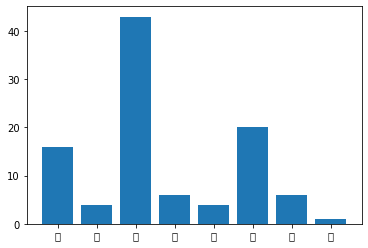

In [51]:
import matplotlib.pyplot as plt
plt.bar(theme_count.keys(), theme_count.values())

#일본어 폰트 matplotlib에 적용

아예 미래 NLP프로젝트 후보언어인 중국어, 한국어, 일본어, 영어를 모두 커버하는 Noto Serif CJK 폰트를 사용하기로 결정

In [60]:
import seaborn as sns
import matplotlib as mat
import matplotlib.pyplot as plt
from matplotlib import rc

In [61]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq #이전에 한글 폰트 문제로 사용한 코드 (일본어 폰트와는 관계 없을듯)

import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore') 

path = '/usr/share/fonts/TAVE/NotoSerifCJK-Medium.ttc' # NotoSerifCJK 경로복사 
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)
fm._rebuild()

Selecting previously unselected package fonts-nanum.
(Reading database ... 155229 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [63]:
#폰트 리스트에 Noto Seij CJK가 있는지 확인
[font.name for font in fm.fontManager.ttflist if font.name[:4]=='Noto']

['Noto Serif CJK JP']

In [65]:
#아마 matplotlib 사용 폰트가 Noto Seij CJK인지 확인
print(mat.rcParams['font.family'])

['Noto Serif CJK JP']


<BarContainer object of 8 artists>

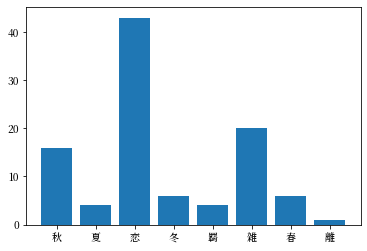

In [67]:
#해결!!

import matplotlib.pyplot as plt
plt.bar(theme_count.keys(), theme_count.values())



---



이후 머신러닝 학습 등의 편의를 위해 새로운 주제 인덱스를 만들어보겠습니다.

사계절 주제를 통합한 계절열과, 앞서 언급한 '여행'과 '이별(떠남)'의 주제를 통합한 기타열을 만들겠습니다.

In [56]:
def new_theme(x):
  if x in ['春','夏','秋','冬']:
    return '季'
  elif x in ['羇','離']:
    return '他'
  else:
    return x

In [57]:
ogura['theme2']=ogura.theme.apply(new_theme)

In [58]:
ogura.head()

,nb,theme,hnis,hnis_kn,kimari,kimariji,anki,theme2
0,1,秋,秋の田の かりほの庵の とまをあらみ わが衣手は 露にぬれつつ,あきのたのかりほのいほのとまをあらみわがころもではつゆにぬれつつ,あきの,3,16,季
1,2,夏,春過ぎて 夏来にけらし 白妙の 衣ほすてふ 天の香具山,はるすぎてなつきにけらししろたへのころもほすてふあまのかぐやま,はるす,3,4,季
2,3,恋,足引きの 山鳥の尾の しだり尾の ながながし夜を ひとりかもねむ,あしびきのやまどりのをのしだりをのながながしよをひとりかもねむ,あし,2,16,恋
3,4,冬,田子の浦に 打出でてみれば 白妙の ふじの高嶺に 雪は降りつつ,たごのうらにうちいでてみればしろたへのふじのたかねにゆきはふりつつ,たご,2,6,季
4,5,秋,奥山に 紅葉ふみ分け なく鹿の 聲きく時ぞ 秋は悲しき,おくやまにもみぢふみわけなくしかのこゑきくときぞあきはかなしき,おく,2,6,季


In [59]:
theme2_count=Counter(ogura.theme2)

print(theme2_count.keys())
print(theme2_count.values())

dict_keys(['季', '恋', '他', '雑'])
dict_values([32, 43, 5, 20])


라벨 수가 적어 분류가 쉬워졌을 것입니다.

モデル学習などを容易にするため春夏秋冬の和歌を「季」に、羇と離の和歌を「他」に統合させ'ラベルの数を減らせました。